# Comparison of SVR and ANN in predic Titanic Dataset:

Here’s given a Titanic dataset that contain some features as the following:
*	Pclass: passenger class.
*	Name, Sex, Age: self-explanatory
*	SibSp: how many siblings & spouses of the passenger aboard the Titanic.
*	Parch: how many children & parents of the passenger aboard the Titanic.
*	Ticket: ticket id
*	Fare: price paid (in pounds)
*	Embarked: where the passenger embarked the Titanic. C=Cherbourg, Q=Queenstown, S=Southampton.
*	Survived: that's the label, 0 means the passenger did not survive, while 1 means he/she survived.

The data is already split into a training set and a test set. However, the test data does not contain the labels. Using Google Colaboratory, your goal is to make the best model you can using SVM and ANN in the training data, then make your predictions on the test data and compare which models give the best result.

1. Load the dataset

Using pandas, we have to import the dataset and store it in variable `df`. After that, we can show the data table. There are 9 features and 1 labels which is **Survived**.

In [ ]:
import pandas as pd

df = pd.read_excel('/content/sample_data/titanic_train.xlsx')

df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712833.00,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925.00,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,S,0


The **Name** and **Ticket** features may have various value, and they will be a bit tricky to convert into useful numbers that a model can consume. So, we can ignore them.

In [ ]:
df = df.drop('Name', axis=1)
df = df.drop('Ticket', axis=1)

2. Visualized the data

To further look at our data, we can visualized the data into some charts.
In the training set, we know from the pie chart that only 38.4% passenger are survived from the titanic disaster.

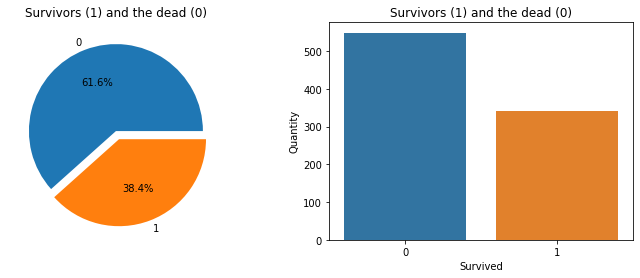

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))
df['Survived'].value_counts().plot.pie(
	explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=False)
ax[0].set_title('Survivors (1) and the dead (0)')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=df, ax=ax[1])
ax[1].set_ylabel('Quantity')
ax[1].set_title('Survivors (1) and the dead (0)')
plt.show()


We can also further know that more survivor are woman as can we see from the below chart.

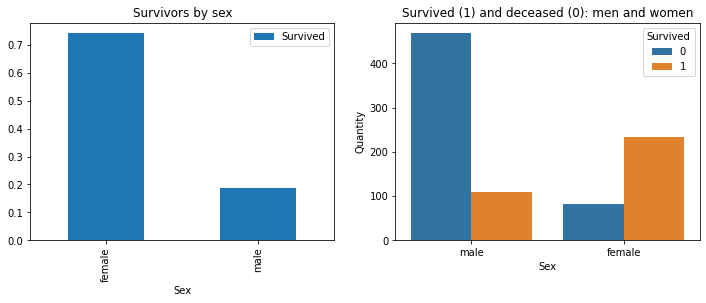

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))
df[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survivors by sex')
sns.countplot(x='Sex', hue='Survived', data=df, ax=ax[1])
ax[1].set_ylabel('Quantity')
ax[1].set_title('Survived (1) and deceased (0): men and women')
plt.show()


3. Handle categorical features

Most of machine learning techniques are only work with numerical data. However, in our data there are 2 features that have categorical data which are **Sex** and **Embarked**. To handle these features, we can use `LabelEncoder` to change them into numerical.

In [ ]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.25,S,0
1,1,female,38.0,1,0,712833.00,C,1
2,3,female,26.0,0,0,7925.00,S,1
3,1,female,35.0,1,0,53.10,S,1
4,3,male,35.0,0,0,8.05,S,0


In [ ]:
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string data into numbers.
sex_encoded = le.fit_transform(df['Sex'])
embark_encoded = le.fit_transform(df['Embarked'])
print("Sex:",sex_encoded[0:5])
print("Embark:",embark_encoded[0:5])

Sex: [1 0 0 0 1]
Embark: [2 0 2 2 2]


After the features changed into numerical, we can show again the dataset. As you can see, the value of Sex has become 1 for Male, and 0 for Female. SImilar thing also happen on Embarked feature.

In [ ]:
df['Sex'] = sex_encoded
df['Embarked'] = embark_encoded

df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.25,2,0
1,1,0,38.0,1,0,712833.00,0,1
2,3,0,26.0,0,0,7925.00,2,1
3,1,0,35.0,1,0,53.10,2,1
4,3,1,35.0,0,0,8.05,2,0


Before the data ready to compute, we can separate the labels from the features. The prediction data is taken from all of feature names, and labels is taken from Survived. After that, we can pass our data into our model and predict the result.

In [ ]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = ['Survived']

data = df[features].values
labels = df[target].values

print(data.shape)
print(labels.shape)

(891, 7)
(891, 1)


4. Build the model

The first model is SVR. Here will be used SVC (because we are on classification problem) from `sklearn`. We will be used `rbf` kernel with `gamma`=1 and `C`=100. You can freely use another hyperparameter value of your own. You can also use `GridSearchCV` to determine best hyperparameter combination without worry doing too much trial and error.

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics

gamma = 1
C = 100
rbf_kernel_svm_clf = SVC(kernel="rbf", gamma=gamma, C=C)
rbf_kernel_svm_clf.fit(data, labels.ravel())

SVC(C=100, gamma=1)

The second model is ANN. However, ANN can give better result if we scalling our data first before pass it to the model. Here will be used `StandardScaler` to scale our data. There is also `MinMaxScaler` to scale the dataset. The scaler is used when the value range between features is to high. Scaler will reduce our the value range between feature to help model learn easier the pattern of the data.

I'am not using the scaler in SVM because I tried several time previously that SVM will give better result if the data is no scaled. Different from ANN tha scaled data will give better result compare to unscaled data.

In [ ]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler

PredictorScalerFit = StandardScaler().fit(data)

# Generating the standardized values of X and y
X_scaled = PredictorScalerFit.transform(data)

After the data was scaled, here is the ANN model. You can see the detail of the architecture when call `Summary` function.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([Dense(100, activation="relu", kernel_initializer='normal', input_shape=data.shape[1:]),
                    Dense(100, kernel_initializer='normal', activation='relu'),
                    Dense(100, kernel_initializer='normal', activation='relu'),
                    Dense(1, kernel_initializer='normal', activation='sigmoid')])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 100)               800       
                                                                 
 dense_25 (Dense)            (None, 100)               10100     
                                                                 
 dense_26 (Dense)            (None, 100)               10100     
                                                                 
 dense_27 (Dense)            (None, 1)                 101       
                                                                 
Total params: 21,101
Trainable params: 21,101
Non-trainable params: 0
_________________________________________________________________


Because we are doing binary classification, the loss will be `binary_crossentropy` with Adam optimizer.

In [ ]:
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])
history = model.fit(X_scaled, labels ,batch_size = 10, epochs = 100, 
                    callbacks=keras.callbacks.EarlyStopping(monitor='val_loss', patience=10), verbose=1, validation_split=0.25)

Epoch 1/100
67/67 [==============================] - 1s 6ms/step - loss: 0.5783 - accuracy: 0.7275 - val_loss: 0.3954 - val_accuracy: 0.8251
Epoch 2/100
67/67 [==============================] - 0s 4ms/step - loss: 0.4688 - accuracy: 0.7889 - val_loss: 0.3882 - val_accuracy: 0.8296
Epoch 3/100
67/67 [==============================] - 0s 3ms/step - loss: 0.4413 - accuracy: 0.8099 - val_loss: 0.3798 - val_accuracy: 0.8386
Epoch 4/100
67/67 [==============================] - 0s 4ms/step - loss: 0.4349 - accuracy: 0.8129 - val_loss: 0.3915 - val_accuracy: 0.8296
Epoch 5/100
67/67 [==============================] - 0s 4ms/step - loss: 0.4330 - accuracy: 0.7994 - val_loss: 0.3673 - val_accuracy: 0.8386
Epoch 6/100
67/67 [==============================] - 0s 4ms/step - loss: 0.4337 - accuracy: 0.8159 - val_loss: 0.3782 - val_accuracy: 0.8430
Epoch 7/100
67/67 [==============================] - 0s 4ms/step - loss: 0.4218 - accuracy: 0.8249 - val_loss: 0.3641 - val_accuracy: 0.8430
Epoch 8/100
6

I also used `EarlyStopping` to monitor the prediction progress. The iteration stop at 24 epoch means that there will be no more improvemen result in the next iteration. 

Then, we can easily plot the iteration progress of our ANN model.

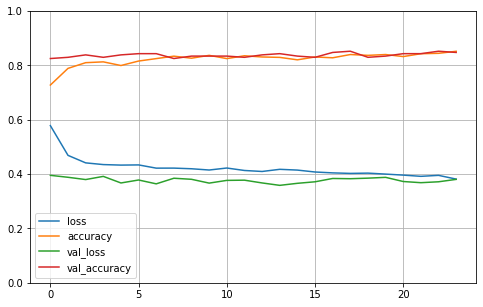

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

5. Comparation result between SVR vs ANN

From the accuracy, in this case can be seen that SVR is much better than ANN and give 98.2% compare to just 85.18% on ANN with only 84.75% on validation data.

In [ ]:
SVR_train_pred = rbf_kernel_svm_clf.predict(data) # SVR is give better prediction with actual data not scaled one
ANN_train_pred = model.predict(X_scaled)

print('SVR Accuracy: %.2f%%' % (metrics.accuracy_score(SVR_train_pred,y)*100))
print('ANN Accuracy :%.2f%%' % (history.history['accuracy'][-1]*100))
print('ANN Val Accuracy:%.2f%%' % (history.history['val_accuracy'][-1]*100))

SVR Accuracy: 98.20%
ANN Accuracy :85.18%
ANN Val Accuracy:84.75%


ANN output is in float number so we have to round the output to clearly see the prediction value.

In [ ]:
import numpy as np
round_pred = np.round(ANN_train_pred)

6. Plotting confusion matrix

To make better visualization of the result, we can make confusion matrix. The confusion matrix will be visualize how much we make correct prediction on each class.

In [ ]:
SVR_cnf_matrix = metrics.confusion_matrix(labels, SVR_train_pred)
ANN_cnf_matrix = metrics.confusion_matrix(labels, round_pred)

Text(0.5, 257.44, 'Predicted label')

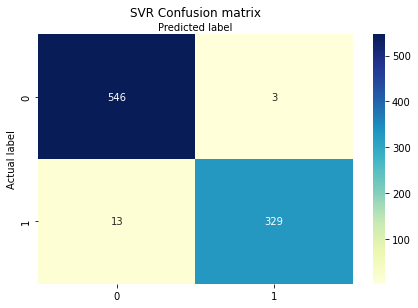

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(SVR_cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('SVR Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The above figure is from SVR. You can see in class 0 or died passenger, SVR did 546 correct prediction and only 3 wrong prediction. But in class 1, there are 13 wrong prediction with 329 correct.

Text(0.5, 257.44, 'Predicted label')

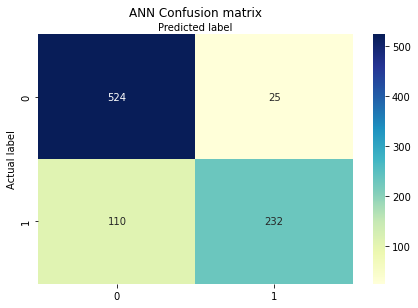

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(ANN_cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('ANN Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The significant result from ANN that there are 25 wrong prediction in class 0 and much more wrong prediction from class 1.

Can be seen that in this problem, SVR give better result from ANN method.

7. Make prediction on test set

The goal from this example is make a prediction on test set. As I mentioned previously, the test set don't have labels. So whatever the prediction result, we can't compare to the actual. We just can believe from previous training result.

In this test set, we just do the similar thing from the previous training set. So, I will not give any description if they have already described previously.

In [ ]:
import pandas as pd

df_test = pd.read_excel('/content/sample_data/titanic_test.xlsx')

df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,78292.0,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,96875.0,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,86625.0,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,122875.0,S


In [ ]:
df_test = df_test.drop('Name', axis=1)
df_test = df_test.drop('Ticket', axis=1)

df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,78292.0,Q
1,3,female,47.0,1,0,7.0,S
2,2,male,62.0,0,0,96875.0,Q
3,3,male,27.0,0,0,86625.0,S
4,3,female,22.0,1,1,122875.0,S


In [ ]:
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string data into numbers.
sex_encoded = le.fit_transform(df_test['Sex'])
embark_encoded = le.fit_transform(df_test['Embarked'])
df_test['Sex'] = sex_encoded
df_test['Embarked'] = embark_encoded

df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,78292.0,1
1,3,0,47.0,1,0,7.0,2
2,2,1,62.0,0,0,96875.0,1
3,3,1,27.0,0,0,86625.0,2
4,3,0,22.0,1,1,122875.0,2


In [ ]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

data_test = df_test[features].values

print(data_test.shape)

(418, 7)


In [ ]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler

PredictorScalerFit = StandardScaler().fit(data_test)

# Generating the standardized values of X and y
X_test_scaled = PredictorScalerFit.transform(data_test)

Ok, different from training data, we don't have build the model anymore. We just use the previous model to predict the test data then visualize the result.

Here, the SVR prediction is shown on SVR Predictions column and ANN Predictions for ANN.

In [ ]:
# Generating Predictions on testing data

svr_test_predict = rbf_kernel_svm_clf.predict(data_test)
ann_test_predict = model.predict(X_test_scaled)

df_test['SVR Predictions'] = svr_test_predict
df_test['ANN Predictions'] = np.round(ann_test_predict).astype(int)
df_test.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,SVR Predictions,ANN Predictions
0,3,1,34.5,0,0,78292.00,1,0,0
1,3,0,47.0,1,0,7.00,2,0,0
2,2,1,62.0,0,0,96875.00,1,0,0
3,3,1,27.0,0,0,86625.00,2,1,0
4,3,0,22.0,1,1,122875.00,2,0,0
5,3,1,14.0,0,0,9225.00,2,0,0
6,3,0,30.0,0,0,76292.00,1,0,1
7,2,1,26.0,1,1,29.00,2,0,0
8,3,0,18.0,0,0,72292.00,0,0,1
9,3,1,21.0,2,0,24.15,2,0,0


To more clearly see, we can also make a chart for the result from each method.

First, SVR predict that from test data, only 13.4% passenger alive from titanic and more than 86% died or more than 350 people. That's more value given than in ANN prediction in the next chart.

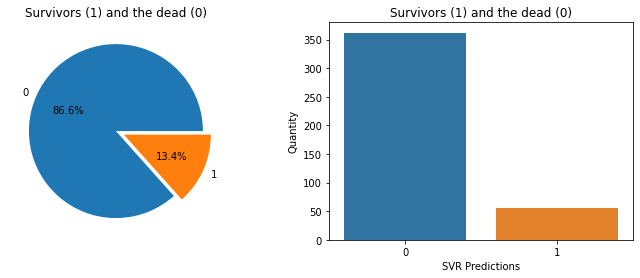

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))
df_test['SVR Predictions'].value_counts().plot.pie(
	explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=False)
ax[0].set_title('Survivors (1) and the dead (0)')
ax[0].set_ylabel('')
sns.countplot(x='SVR Predictions', data=df_test, ax=ax[1])
ax[1].set_ylabel('Quantity')
ax[1].set_title('Survivors (1) and the dead (0)')
plt.show()

Meanwhile for ANN only 68.2% passenger died and about 31.8% alive.

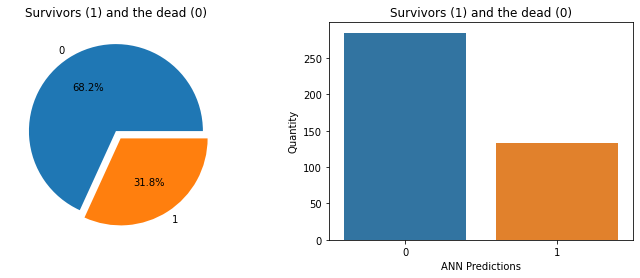

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))
df_test['ANN Predictions'].value_counts().plot.pie(
	explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=False)
ax[0].set_title('Survivors (1) and the dead (0)')
ax[0].set_ylabel('')
sns.countplot(x='ANN Predictions', data=df_test, ax=ax[1])
ax[1].set_ylabel('Quantity')
ax[1].set_title('Survivors (1) and the dead (0)')
plt.show()